In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


data=pd.read_csv("kc_house_data.csv")

In [189]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [191]:
data.shape

(21613, 21)

In [192]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [193]:
data.isnull().sum().sum()

0

In [194]:
#delete unnecessary column (id,long,lat',view)
del data['id']
del data['view']
del data['zipcode']
del data['sqft_living15']
del data['sqft_lot15']

In [195]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045


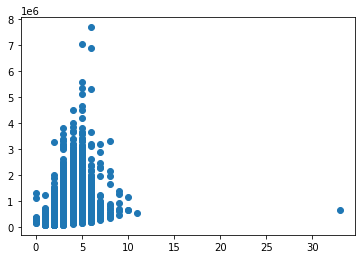

In [196]:
import seaborn as sns
plt.scatter(data["bedrooms"] ,data["price"])

In [197]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

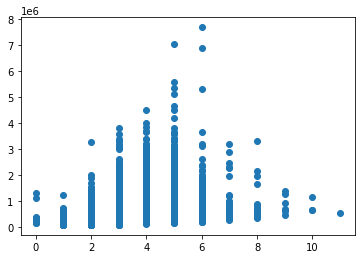

In [198]:
#removing the outiler (33 bedrooms) to have a better visualization 
data=data[data['bedrooms']!=33]
plt.scatter(data["bedrooms"] ,data["price"])

The frequency of no of bedrooms=[3,6] is high. The price is note so correlated with the number of bedrooms,because the price depends also on other features like bathrooms,space etc.

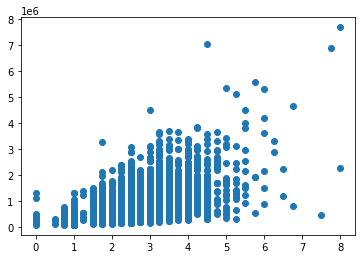

In [199]:
plt.scatter(data["bathrooms"] ,data["price"])

the number of bathrooms and the price of the house is strongly correlated

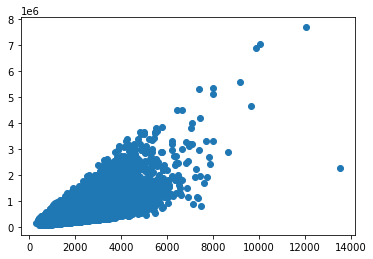

In [200]:
plt.scatter(data["sqft_living"] ,data["price"])

the number of bathrooms and the price of the house is strongly correlated,larger living space comes with a bigger price

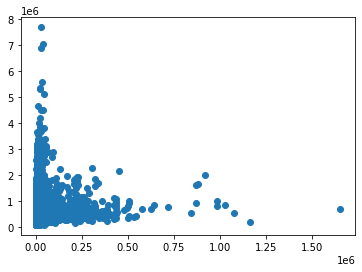

In [201]:
plt.scatter(data["sqft_lot"] ,data["price"])

most houses have a small lot space,and the price depends more on other features

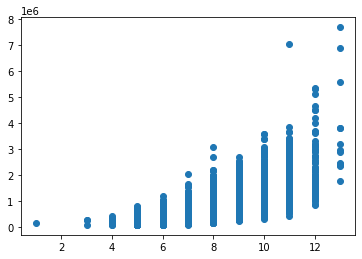

In [202]:
plt.scatter(data["grade"] ,data["price"])

the grade and the price of the house is strongly correlated,It determines the overall value of the house

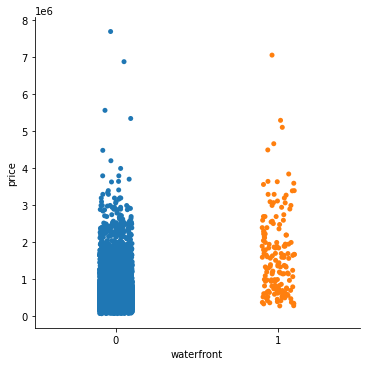

In [203]:
sns.catplot(x='waterfront',y='price',data=data)

number of houses with no water front is larger,but there prices can go higher then those with water fronts because other features

In [204]:
data['condition'].value_counts()

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

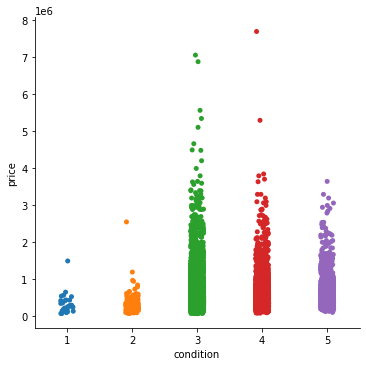

In [205]:
sns.catplot(x='condition',y='price',data=data)

people tend to spend less if the condition of the house is bad

In [206]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.036336,0.667447,0.605591,0.323812,0.054023,0.126437,0.306998,0.021637
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.309490,0.159167,0.019617,-0.010541,0.133882
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.283789,0.506012,0.050735,0.024594,0.223028
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.435065,0.318037,0.055358,0.052552,0.240209
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.015293,0.053073,0.007641,-0.085675,0.229516
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.006330,0.049655,0.125388
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,-0.014270,-0.041914
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,0.174057,-0.361380,-0.060602,-0.015048,-0.106423
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.168412,0.446952,0.014409,0.114111,0.198355
sqft_above,0.605591,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,-0.051918,0.423879,0.023276,-0.000778,0.343780


<AxesSubplot:>

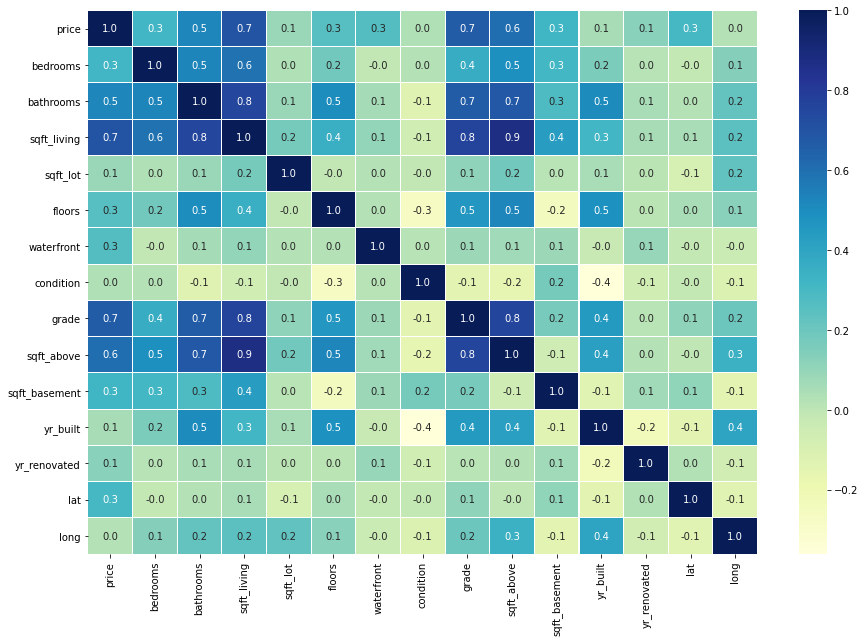

In [207]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap = 'YlGnBu' ,linewidths=.1, fmt= '.1f',ax=ax)

By observing the diffrent plots,we can see that the price is dependent on various features the most important ones are : grade,sqft_living,sqft_abouve,bathrooms,bedrooms,floors,condition.

other features like (y_built,y_renovated,sqlt_lot, waterfront ,view) are less important

while(id,lat,long,view,zipcode..) dont have any effect on the price



# Modeling :

linear regression :

In [245]:
x=data['sqft_living'].values.reshape(-1,1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)

In [246]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [247]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 63626156706.13171
R squared 0.4689763547454001


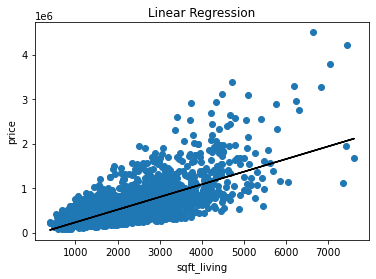

In [248]:
plt.scatter(x_test.squeeze(),y_test,label="data points")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_test,model.predict(x_test),color="k")
plt.show()

Multi-linear regression :

In [249]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [250]:
x=data[['grade','sqft_living','sqft_above','bathrooms','bedrooms','floors','condition','lat','long']]
y=data['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)

In [251]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [252]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 45068654994.93957
R squared 0.6238571885982178


by comparing the linear regression and the Multi-linear regression, we notice that the Multi-linear regression is slightly better,and we were able to minimize the prediction errors since the prices of houses depends on multiple features.

Polynomial regression :

Polynomial linear :

In [258]:
x=data['sqft_living'].values.reshape(-1,1)
y=data['price']

lg=LinearRegression()
poly = PolynomialFeatures(degree=3)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 

predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58380436156.19242
R squared:  0.512757117133446


polynomial multi regression :

In [263]:
x=data[['grade','sqft_living','sqft_above','bathrooms','bedrooms','floors','condition','lat','long']]
y=data['price'].values

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)  #splitting data

x_train_fit = poly.fit_transform(x_train) #transforming our input data
x_test_ = poly.fit_transform(x_test)

lg.fit(x_train_fit, y_train) # Fitting Polynomial Regression to the dataset 
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  169067926332.72067
R squared:  -0.4110402259796624


by comparing the Polynomial regression with the linear and the Multi-linear regression, we notice that loss function (MSE) is smaller when using Polynomial regression and the R squared value is higher, therfore we were able to minimize the prediction errors since the prices of houses depends on multiple features and the regression is curvy and not linear so it will be batter explained with a polynomial model.